In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import ruamel.yaml as yaml

from soul_gan.utils.general_utils import ROOT_DIR, DotConfig


In [4]:
sns.set_theme()

In [5]:
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('lines', linewidth=3)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
def plot_res(log_path, config, arange):

    try:
        is_values = np.loadtxt(Path(log_path, 'is_values.txt'))[:, 0]
        fig = plt.figure()
        plt.plot(np.arange(len(is_values))*arange[1], is_values)
        plt.xlabel('Iteration')
        plt.ylabel('IS')
        plt.title('Inception Score')
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_is.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_is.pdf'))
        plt.close()
    except:
        print('is failed')

    try:
        fid_values = np.loadtxt(Path(log_path, 'fid_values.txt'))
        fig = plt.figure()
        plt.plot(np.arange(len(fid_values))*arange[1], fid_values)
        plt.xlabel('Iteration')
        plt.ylabel('FID')
        plt.title('FID Score')
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_fid.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_fid.pdf'))
        plt.close()
    except:
        print('fid failed')

    try:
        callback_results = np.loadtxt(Path(log_path, 'callback_results.txt'))
        energy_results = callback_results[0]
        dgz_results = callback_results[1]
        fig = plt.figure()
        plt.plot(np.arange(len(energy_results))*arange[1], energy_results)
        plt.xlabel('Iteration')
        plt.ylabel(r'$U(z)$')
        plt.title('Energy')
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_energy.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_energy.pdf'))
        plt.close()
    except:
        print('energy failed')

    try:
        callback_results = np.loadtxt(Path(log_path, 'callback_results.txt'))
        energy_results = callback_results[0]
        dgz_results = callback_results[1]
        fig = plt.figure()
        plt.plot(arange, dgz_results)
        plt.xlabel('Iteration')
        plt.ylabel(r'$d(G(z))$')
        plt.axhline(config.thermalize[False]['real_score'], linestyle='--', label='avg real score', color='r')
        plt.title('Discriminator scores')
        plt.legend()
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_dgz.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_dgz.pdf'))
        plt.close()
    except:
        print('dgz failed')

    if Path(log_path, 'weight_norm.txt').exists():

        weight_norms = np.loadtxt(Path(log_path, 'weight_norm.txt')).reshape(-1, len(arange))
        mean = weight_norms.mean(0)
        std = weight_norms.std(0)
        fig = plt.figure()
        plt.plot(np.arange(len(mean))*arange[1], mean)
        plt.fill_between(np.arange(len(mean))*arange[1], mean - 1.96 * std, mean + 1.96 * std, alpha=0.3, label='95% CI')
        for weight_norm in weight_norms[:5]:
            plt.plot(np.arange(len(mean))*arange[1], weight_norm, alpha=0.3)
        plt.xlabel('Iteration')
        plt.ylabel(r'$\Vert \theta\Vert_2$')
        #plt.axhline(config.thermalize[False]['real_score'], linestyle='--', label='avg real score', color='r')
        plt.title('Weight convergence')
        plt.legend()
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_weight.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_weight.pdf'))
        plt.close()

    if Path(log_path, 'out.txt').exists():
        outs = np.loadtxt(Path(log_path, 'out.txt')).reshape(-1, len(arange))
        mean = outs.mean(0)
        std = outs.std(0)
        fig = plt.figure()
        plt.plot(np.arange(len(mean))*arange[1], mean)
        plt.fill_between(np.arange(len(mean))*arange[1], mean - 1.96 * std, mean + 1.96 * std, alpha=0.3, label='95% CI')
        for out in outs[:5]:
            plt.plot(np.arange(len(mean))*arange[1], out, alpha=0.3)
        
        # if Path(log_path, 'ref_score.txt').exists():

        plt.xlabel('Iteration')
        plt.ylabel(r'$F(x)$')
        #plt.axhline(config.thermalize[False]['real_score'], linestyle='--', label='avg real score', color='r')
        plt.title('F(x)')
        plt.legend()
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_out.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_out.pdf'))
        plt.close()

    if Path(log_path, 'residual.txt').exists():
        residuals = np.loadtxt(Path(log_path, 'residual.txt')).reshape(-1, len(arange))
        mean = residuals.mean(0)
        std = residuals.std(0)
        fig = plt.figure()
        plt.plot(np.arange(len(mean))*arange[1], mean)
        plt.fill_between(np.arange(len(mean))*arange[1], mean - 1.96 * std, mean + 1.96 * std, alpha=0.3, label='95% CI')
        for res in residuals[:5]:
            plt.plot(np.arange(len(mean))*arange[1], res, alpha=0.3)
        
        # if Path(log_path, 'ref_score.txt').exists():

        plt.xlabel('Iteration')
        plt.ylabel(r'$\hat{\mathbb{E}}_{\pi_{\theta}}\Vert F(G(z)))-\pi_{data}(F)\Vert$')
        #plt.axhline(config.thermalize[False]['real_score'], linestyle='--', label='avg real score', color='r')
        plt.title('Residual')
        plt.legend()
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_residual.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_residual.pdf'))
        plt.close()

    if Path(log_path, 'dot_pr.txt').exists():
        residuals = np.loadtxt(Path(log_path, 'dot_pr.txt')).reshape(-1, len(arange))
        mean = residuals.mean(0)
        std = residuals.std(0)
        fig = plt.figure()
        plt.plot(np.arange(len(mean))*arange[1], mean)
        plt.fill_between(np.arange(len(mean))*arange[1], mean - 1.96 * std, mean + 1.96 * std, alpha=0.3, label='95% CI')
        for res in residuals[:5]:
            plt.plot(np.arange(len(mean))*arange[1], res, alpha=0.3)
        
        # if Path(log_path, 'ref_score.txt').exists():

        plt.xlabel('Iteration')
        plt.ylabel(r'$\langle \theta, F(x) \rangle$')
        #plt.axhline(config.thermalize[False]['real_score'], linestyle='--', label='avg real score', color='r')
        plt.title('Weigth-feauture dot product')
        plt.legend()
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_dot_pr.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_dot_pr.pdf'))
        plt.close()

    if Path(log_path, 'dot_pr.txt').exists() and Path(log_path, 'Energy.txt').exists():
        residuals = np.loadtxt(Path(log_path, 'dot_pr.txt')).reshape(-1, len(arange))
        mean = residuals.mean(0)
        std = residuals.std(0)

        energies = np.loadtxt(Path(log_path, 'Energy.txt')).reshape(-1, len(arange))
        mean += energies.mean(0)
        std += energies.std(0)

        fig = plt.figure()
        plt.plot(np.arange(len(mean))*arange[1], mean)
        plt.fill_between(np.arange(len(mean))*arange[1], mean - 1.96 * std, mean + 1.96 * std, alpha=0.3, label='95% CI')
        # for res in residuals[:5]:
        #     plt.plot(np.arange(len(mean))*arange[1], res, alpha=0.3)
        
        # if Path(log_path, 'ref_score.txt').exists():

        plt.xlabel('Iteration')
        #plt.ylabel(r'$\hat{\mathbb{E}}_{\pi_{\theta}}\Vert F(G(z)))-\pi_{data}(F)\Vert$')
        plt.ylabel(r'$\langle \theta, F(G(z)) \rangle + U(z)$')
        #plt.axhline(config.thermalize[False]['real_score'], linestyle='--', label='avg real score', color='r')
        plt.title('Energy of dist with constraint')
        plt.legend()
        fig.tight_layout()
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_sum.png'))
        plt.savefig(Path(log_path, 'figs', f'{log_path.name}_sum.pdf'))
        plt.close()

In [7]:
# Path('some.txt').open('w').write('\
# 0.000000000000000000e+00 1.692337632179260254e+00 1.955699682235717773e+00 2.090187072753906250e+00 2.202907085418701172e+00 2.282454252243041992e+00 2.380316734313964844e+00 2.443105459213256836e+00 2.489995479583740234e+00 2.568444252014160156e+00 2.609169721603393555e+00 2.600733518600463867e+00 2.605199813842773438e+00 2.591424703598022461e+00 2.642232656478881836e+00 2.700360536575317383e+00 2.734471797943115234e+00 2.755367040634155273e+00 2.764559268951416016e+00 2.788673877716064453e+00 2.749524831771850586e+00 2.795939445495605469e+00 2.820138931274414062e+00 2.822337627410888672e+00 2.792717933654785156e+00 2.831691741943359375e+00 2.813915252685546875e+00 2.808730125427246094e+00 2.811447620391845703e+00 2.777168989181518555e+00 2.800547838211059570e+00 2.798245429992675781e+00 2.826055526733398438e+00 2.795619726181030273e+00 2.752202987670898438e+00 2.745911359786987305e+00 2.768913507461547852e+00 2.790482282638549805e+00 2.813791513442993164e+00 2.768628597259521484e+00 2.805598974227905273e+00 \n\
# 0.000000000000000000e+00 1.668902397155761719e+00 1.915048718452453613e+00 2.034396886825561523e+00 2.135133981704711914e+00 2.223660230636596680e+00 2.268137931823730469e+00 2.406196117401123047e+00 2.461409091949462891e+00 2.498932600021362305e+00 2.545799255371093750e+00 2.532538890838623047e+00 2.534296035766601562e+00 2.558458089828491211e+00 2.604765176773071289e+00 2.695053577423095703e+00 2.686410188674926758e+00 2.680880784988403320e+00 2.696000099182128906e+00 2.708842277526855469e+00 2.758109331130981445e+00 2.793910503387451172e+00 2.812906742095947266e+00 2.805714607238769531e+00 2.799506187438964844e+00 2.790133237838745117e+00 2.783660411834716797e+00 2.837615966796875000e+00 2.874148130416870117e+00 2.918921947479248047e+00 2.896153211593627930e+00 2.821365833282470703e+00 2.787875652313232422e+00 2.743401765823364258e+00 2.786046981811523438e+00 2.830179691314697266e+00 2.876456975936889648e+00 2.940192222595214844e+00 2.961699962615966797e+00 2.958764314651489258e+00 2.936460733413696289e+00 \n\
# ')

In [8]:
# arr = np.loadtxt('some.txt')
# #plt.plot(np.arange(arr.shape[0]), arr) #.mean())
# plt.plot(np.arange(arr.shape[1]), arr.mean(0))
# plt.fill_between(np.arange(arr.shape[1]), arr.mean(0)-1.96*arr.std(0), arr.mean(0)+1.96*arr.std(0), alpha=0.3)

In [16]:
feature = 'dumb'
#feature = 'discriminator'
feature = 'cluster'
# feature = 'identity'
#feature = 'resnet34'
#feature = 'cluster_resnet34'

target = 'Discriminator'
#target = 'Prior'

# model = 'dcgan_test_0.01_0.1'
#model = 'dcgan_0.01'
#model = 'wgan_gp_0.001'
#model = 'wgan_gp_0.1'
# model = 'sngan_ns_0.003'
model = 'dcgan_0.01'
model = 'mlp_0.01'
#model = 'sngan_ns_0.1' #001'
# model = 'snresnet_0.01'
#model = 'studio_wgan_gp_0.001'

logdir = Path(ROOT_DIR, 'log', f'{feature}_feature_{target}Target')

mlp-cluster
is failed
fid failed
dgz failed


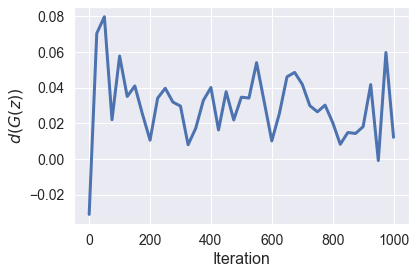

In [17]:
logs = list(logdir.glob(model))

for gan_logpath in logs:
    # if 'test' in gan_logpath.stem:
    #     continue
    configs = list(gan_logpath.glob('*.yml'))
    config_path = configs[0] if configs[1].stem == 'gan_config' else configs[1]
    gan_config_path = configs[1] if configs[1].stem == 'gan_config' else configs[0]
    print(config_path.stem)

    Path(gan_logpath, 'figs').mkdir(exist_ok=True)
    #config_path = Path(gan_logpath, 'dcgan-dumb.yml')
    config = DotConfig(yaml.round_trip_load(config_path.open('r')))
    n_steps = config.n_steps
    every = config.every

    gan_config = DotConfig(yaml.round_trip_load(gan_config_path.open('r'))['gan_config'])

    arange = np.arange(0, n_steps + 1, every)
    #try:
    plot_res(gan_logpath, gan_config, arange)
    # except:
    #   print('fail')


In [11]:
logs

[]

In [31]:
arange

array([   0,   25,   50,   75,  100,  125,  150,  175,  200,  225,  250,
        275,  300,  325,  350,  375,  400,  425,  450,  475,  500,  525,
        550,  575,  600,  625,  650,  675,  700,  725,  750,  775,  800,
        825,  850,  875,  900,  925,  950,  975, 1000])